In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!source ~/.azure.sh

In [3]:
from azureml.core.authentication import ServicePrincipalAuthentication
from azureml.core import Workspace, Run as AzureMLRun

In [4]:
sp_auth = ServicePrincipalAuthentication(
    tenant_id=os.environ["AZURE_TENANT_ID"],
    service_principal_id=os.environ["AZURE_CLIENT_ID"],
    service_principal_password=os.environ["AZURE_CLIENT_SECRET"],
)
ws = Workspace(
    subscription_id=os.environ["AZURE_SUBSCRIPTION_ID"],
    resource_group="PSL-PMP-ML",
    workspace_name="psl-ml-workspace",
    auth=sp_auth,
)

In [5]:
run = AzureMLRun(ws.experiments["Nested-EAGLE-v0"], run_id="124b960f-923a-4af6-85d9-2cf0dfa763ce")

In [6]:
tloss = np.array(list(run.get_metrics("train_wmse_epoch").values())).squeeze()
vloss = np.array(list(run.get_metrics("val_wmse_epoch").values())).squeeze()

In [8]:
plt.style.use("~/nice.mplstyle")

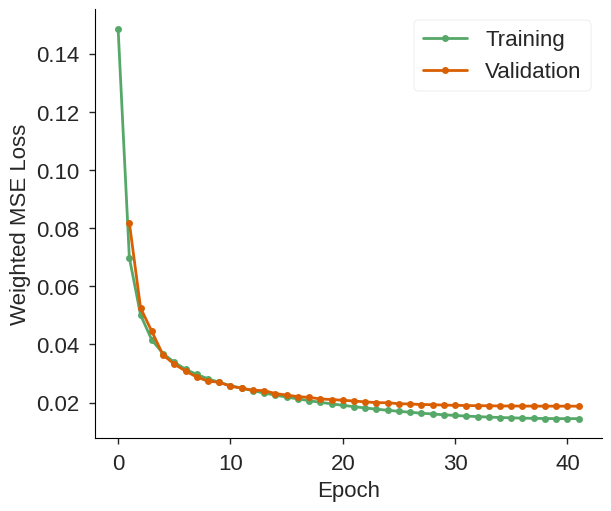

In [13]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

for x, y, label in zip(
    [np.arange(len(tloss)), np.arange(len(vloss))+1],
    [tloss, vloss],
    ["Training", "Validation"],
):
    ax.plot(
        x, y,
        marker="o",
        markersize=5,
        label=label,
    )
ax.set(
    xlabel="Epoch",
    ylabel="Weighted MSE Loss",
)
ax.legend();
fig.savefig(f"figures/mmgt_loss.jpeg", bbox_inches="tight", dpi=300)